In [1]:
from sklearn.datasets import load_digits

In [4]:
data = load_digits()
X = data.data
y = data.target

print X
print y

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


## 1.

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
from sklearn.cross_validation import cross_val_score

print "Answer1:"
print cross_val_score(clf, X, y, cv=10).mean()

Answer1:
0.833071431166


## 2.

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [11]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)

print "Answer2:"
print cross_val_score(bagging, X, y, cv=10).mean()

Answer2:
0.922685742828


## 3.

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на d‾‾√ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [14]:
from math import pow

bagging2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=pow(len(y), 0.5) / len(y))

print "Answer3:"
print cross_val_score(bagging2, X, y, cv=10).mean()

Answer3:
0.882537482762


## 4.

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d‾‾√ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [20]:
bagging3 = BaggingClassifier(DecisionTreeClassifier(max_features=int(pow(X.shape[1], 0.5))), n_estimators=100)

print "Answer4:"
print cross_val_score(bagging3, X, y, cv=10).mean()

Answer4:
0.946106263063


## 5.

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [32]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

n_trees = [1, 5, 10, 50, 100, 200, 300]
answers_n_trees = []
for i in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_clf.fit(X, y)
    answers_n_trees.append(cross_val_score(rf_clf, X, y, cv=10).mean())


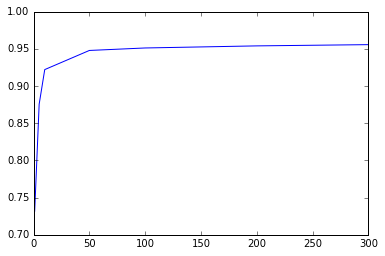

In [33]:
plt.plot(n_trees, answers_n_trees)

In [38]:
n_features = range(1, 64, 4)
answers_max_features = []
for i in n_features:
    rf_clf = RandomForestClassifier(max_features=i)
    rf_clf.fit(X, y)
    answers_max_features.append(cross_val_score(rf_clf, X, y, cv=10).mean())


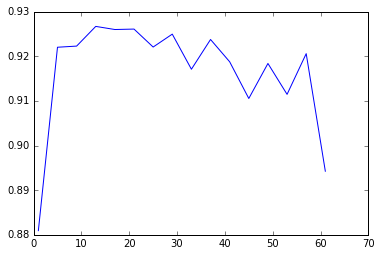

In [39]:
plt.plot(n_features, answers_max_features)

In [35]:
max_depth = range(1, 64, 4)
answers_max_depth = []
for i in max_depth:
    rf_clf = RandomForestClassifier(max_depth=i)
    rf_clf.fit(X, y)
    answers_max_depth.append(cross_val_score(rf_clf, X, y, cv=10).mean())



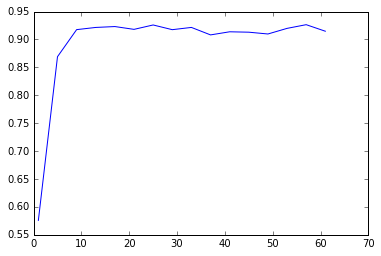

In [36]:
plt.plot(max_depth, answers_max_depth)


На основе наблюдений выпишите номера правильных утверждений из приведенных ниже (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [40]:
print "Answer5:"
print 2, 3, 4, 7

Answer5:
2 3 4 7
